# This code is intended to be used for offline analysis of the seismic data retreived from the Minimus during site surveying.

## You may need to update the widget package to make this work.

### pip install ipywidgets --upgrade
### conda install conda-forge::ipywidgets

## This is used to import the mseed files:
### pip install obpy --upgrade
### conda install conda-forge::obspy

# ---------------------
# Do not run all
# ---------------------

# Run one cell at a time or plots may not populate

In [24]:
print("thinking...")
import obspy
from obspy import UTCDateTime
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, IntSlider
print("thinking...")
from ipywidgets import FloatSlider
from ipywidgets import Layout 
from scipy import signal
from matplotlib import gridspec
from scipy.fft import fftshift
import warnings
import os
print("ready (☆•ヮ•)八(•ヮ•)")

thinking...
thinking...
ready (☆•ヮ•)八(•ヮ•)


## This creates a GUI to select the data-file you wish to use
### A program window will appear in your taskbar, this will bring up the GUI
### This is code is intended to run off 3 mseed files, as the minimus creates a file for each direction
# The GUI will start in the directory of the code. You will have to manually navigate to the Downloads folder to select the proper file you wish
## When you have selected your file, close the program window

In [25]:
####################################################### # # # # # # ############################################################
################################################### # SPAGHETTI CODE # #########################################################
###################################################### # # # # # # # ###########################################################

file_paths_global = [] ###################################### Variable for the data paths ######################################

################################################# Function to create GUI #######################################################
def upload_files():
    global file_paths_global ################################### makes variable global #########################################
    
    file_paths_global = filedialog.askopenfilenames(title="Select files", filetypes=[("All Files", "*.*")])
    
    if file_paths_global:
        for file_path in file_paths_global:
            print(f"File selected: {file_path}") ######################## Prints out the selected files ########################
        print("\nclose the program window")
    else:
        print("No files selected.")


root = tk.Tk() ######################################## Create the program window ##############################################
root.title("Multi File Uploader")

upload_button = tk.Button(root, text="Upload Files", command=upload_files) ######## Create buttons for uploading files #########
upload_button.pack(pady=10)

root.mainloop() ######################################### Runs the application #################################################

################################# sorts paths alphabetically and saves it to a variable ########################################
paths = sorted(file_paths_global)
print("\nFinished (ﾉ◕ヮ◕)ﾉ*:･ﾟ✧")

File selected: C:/Users/cacam/Documents/data_files/MIN-1D68-files(1)/001D68_S0SeisEA_______00200_00006.mseed
File selected: C:/Users/cacam/Documents/data_files/MIN-1D68-files(1)/001D68_S0SeisXA_______00200_00002.mseed
File selected: C:/Users/cacam/Documents/data_files/MIN-1D68-files(1)/001D68_S0SeisZA_______00200_00000.mseed

close the program window

Finished (ﾉ◕ヮ◕)ﾉ*:･ﾟ✧


# This is where you select the time frame you wish to look at

In [26]:
#################################### Enter the start and end times wish to look at #############################################
'''```````````````````````````````  start_time = UTCDateTime("2020-01-01T00:00:00")  ````````````````````````````````````````'''
#################################### This is an example of how the time should look ############################################

start_time = UTCDateTime("2024-09-29T21:54:07")
end_time = UTCDateTime("2024-09-29T22:30:03")  

# This selects the data requested and sets it to variables

In [27]:
####################################################### # # # # # # ############################################################
################################################### # SPAGHETTI CODE # #########################################################
###################################################### # # # # # # # ###########################################################

def process_multiple_miniseed(file_paths, start_time=None, end_time=None):
    
    sample_rates_all = []
    times_all = []       ## Variables for the function 
    data_values_all = []
    
    for idx, file_path in enumerate(file_paths):
        print(f"\nProcessing file {idx+1}: {file_path}")
        
        st = obspy.read(file_path) #------------------------------ Reads the MiniSEED file ------------------------------------#
    

        if start_time and end_time: ## Check and apply time selected time 
            
            print(f"Filtering data between {start_time} and {end_time}")
            st = st.trim(starttime=start_time, endtime=end_time) ## trims the traces to the same length       
    
        if len(st) == 0: ## Check if any traces remain after trimming
            print(f"No data available in the specified time range for file: {file_path}")
            continue
        
        sample_rates = []
        times = []         ## lists for the current file's trace(s) 
        data_values = []
        
######################################### Process each remaining trace in the file #############################################

        for trace in st:
            
            
            sample_rates.append(trace.stats.sampling_rate) ############# Append trace data to lists for this file ##############
            times.append(trace.times())                    ################## Relative times for each sample ###################
            data_values.append(trace.data)
        
        sample_rates_all.append(sample_rates)
        times_all.append(times)               ## Append the current file's trace data to the overall lists
        data_values_all.append(data_values)
    
#-------------------------------------------- Assign global variables for each file -------------------------------------------#
    
    global sample_rates1, sample_rates2, sample_rates3
    global times1, times2, times3
    global data1, data2, data3
    
#----------------------------------------------- Assigns variables for each file ----------------------------------------------#

    sample_rates1, sample_rates2, sample_rates3 = sample_rates_all
    times1, times2, times3 = times_all
    data1, data2, data3 = data_values_all
    
#-------------------------------------------------------- Runs function -------------------------------------------------------#
    
process_multiple_miniseed(paths, start_time=start_time, end_time=end_time)


################################################################################################################################


tim1 = times1[0]
tim2 = times2[0]
tim3 = times3[0]
z = data3[0] * 0.0015e-6 #------------------- This the conversion factor for turning the data into m/s ------------------------#
n = data2[0] * 0.0015e-6 
e = data1[0] * 0.0015e-6


########################################### This is the sample rate from the metadata ##########################################

sr =  sample_rates1[0]
print("\nSample rate: " + str(sr))

################################################################################################################################

script_dir = os.getcwd()
control_data_path = os.path.join(script_dir, 'ligo_seis_data.txt')

if os.path.exists(control_data_path):
    huddle = pd.read_csv(control_data_path, delimiter="\s+")

    huddle.columns = ["frequency", "x", "y", "z"]

    hf = huddle["frequency"]
    hx = huddle["x"] * 0.0076 * 10 ** -6
    hy = huddle["y"] * 0.0076 * 10 ** -6 
    hz = huddle["z"] * 0.0076 * 10 ** -6
    
else:
    print("LIGO data not found\n")

print("\nIt's time to boogie (づ｡◕‿‿◕｡)づ")


Processing file 1: C:/Users/cacam/Documents/data_files/MIN-1D68-files(1)/001D68_S0SeisEA_______00200_00006.mseed
Filtering data between 2024-09-29T21:54:07.000000Z and 2024-09-29T22:30:03.000000Z

Processing file 2: C:/Users/cacam/Documents/data_files/MIN-1D68-files(1)/001D68_S0SeisXA_______00200_00002.mseed
Filtering data between 2024-09-29T21:54:07.000000Z and 2024-09-29T22:30:03.000000Z

Processing file 3: C:/Users/cacam/Documents/data_files/MIN-1D68-files(1)/001D68_S0SeisZA_______00200_00000.mseed
Filtering data between 2024-09-29T21:54:07.000000Z and 2024-09-29T22:30:03.000000Z

Sample rate: 200.0

It's time to boogie (づ｡◕‿‿◕｡)づ


## The following cell displays the time series of the recorded data

In [ ]:
############################################ You can define the y limits #######################################################

ylimmax = None
ylimmin = None

####################### You can change the linestyle/order in which they are ploted for ease of viewing ########################
plt.figure(figsize = (19, 11))
ax = plt.gca()
ax.yaxis.get_offset_text().set_fontsize(16)

plt.plot(tim3,z, linewidth = 1.5, color = 'black', label = 'Z') 
plt.plot(tim2,n, linewidth = 1.5, color = 'red', label = 'N')
plt.plot(tim1,e, linewidth = 1.5, color = 'mediumblue', label = 'E')
#plt.plot(tim,noi, linewidth = 1.5, color = 'yellow', label = 'Noise')

plt.legend(loc = "upper right", fontsize = 18)
plt.title("Seismic Data Time Series", fontweight = 'bold', fontsize = 25)
plt.xlabel("Time [s]", fontweight = "bold", fontsize = 20)
plt.ylabel("Amplitude [m/s]", fontweight = "bold", fontsize = 20)

plt.xlim(0, tim1[len(tim1)-1])
plt.ylim(ylimmin,ylimmax)

plt.yticks(fontsize = 20, fontweight = "bold")
plt.xticks(fontsize = 20, fontweight = "bold")
plt.grid(True)

#.savefig('**place_img_name_here.format**', bbox_inches='tight')

## If you want to look at a specific time along the time series, you can use the slider plot below. 

### These variables are used to adjust the how many seconds are displayed and the step length

In [7]:
win = 15  ## sec displayed
stepy = 4  ## sec moved
buffer = 1e-6

## Beware, there may be a slight time delay when slidering

## If the slider is not workering move to the next cell

In [ ]:
Min = min(z.min(), n.min(), e.min())  #------------------------- This is to find the window height ----------------------------#
Max = max(z.max(), n.max(), e.max())


#---------------------------------------- This function is what makes the slider run ------------------------------------------#
#------------------------------------------- Parameters can be changed as needed ----------------------------------------------#


def plot_with_slider(xlim):
    
    plt.figure(figsize=(19, 8))   ## dpi breaks slider
    ax = plt.gca()
    ax.yaxis.get_offset_text().set_fontsize(16)
    
    plt.plot(tim, z, linewidth = 1.5, label = 'Z', color = 'black')
    plt.plot(tim, n, linewidth = 1.5, label = 'N', color = 'red')
    plt.plot(tim, e, linewidth = 1.5, label = 'E', color = 'blue')
    
    plt.xlim(xlim, xlim + win) #---------------------- This is how long the window is (CAN be changed) ------------------------#
    plt.ylim(Min - buffer, Max + buffer) #-------- This adds a buffer to the window height (CAN be changed) -------------------#
    
    plt.legend(loc = 'upper right', fontsize = 15)
    plt.title("Slider Time Series", fontweight = 'bold', fontsize = 25)
    plt.xlabel("Time [s]", fontweight = "bold", fontsize = 20)
    plt.ylabel("Amplitude [m/s]", fontweight = "bold", fontsize = 20)
    plt.yticks(fontsize = 20, fontweight = "bold")
    plt.xticks(fontsize = 20, fontweight = "bold")
    plt.grid(True)
    plt.show()

#--------------------------------------- This is where the slider plot gets plotted -------------------------------------------#
#--- min,max = start,end ; step is the increment it slides on ; value is where it starts ; layout is how long the slider is ---#
#---------------------------------------------- step and layout CAN be changed ------------------------------------------------#

interact(plot_with_slider, xlim = FloatSlider(min = 0, max = (tim[len(tim)-1]), step = stepy, value = 0, 
                                              layout=Layout(width='980px')))


## If you want to look at spectra of specific parts of the time series, you can set the time limits here

## If not, skip this cell

In [10]:
################################### Enter how long of a time segment you'd like to look at #####################################

start = 0  ## In terms of seconds
end = 1000

############################################### This indexes the data frames ###################################################

gamma = int(start * sr)
delta = int(end * sr)

z1 = z[gamma:delta]
n1 = n[gamma:delta]
e1 = e[gamma:delta]

# These are variables to calculate the ASD and plot limits

In [28]:
#-------------------------------------------------------- Plot limits ---------------------------------------------------------#
x_max = 100 ## in terms of frequency
x_min = 0.1

#----------------------------------------------------- Velocity Y limits ------------------------------------------------------#
y_max = 10e-6 ## in terms of ms⁻¹/√Hz
y_min = 50e-12  

#--------------------------------------------------- Displacement Y Limits ----------------------------------------------------#
my_max = 10e-7 ## in terms of m/√Hz
my_min = 10e-12

#-------------------------------------------------------- fft length ----------------------------------------------------------#
fft_length = 128 ## in terms of seconds

#---------------------------------------------------- Precent FFT Overlap -----------------------------------------------------#
overlap = 50 ## 50% fft overlap

# This cell is where the ASD is calculated and plotted

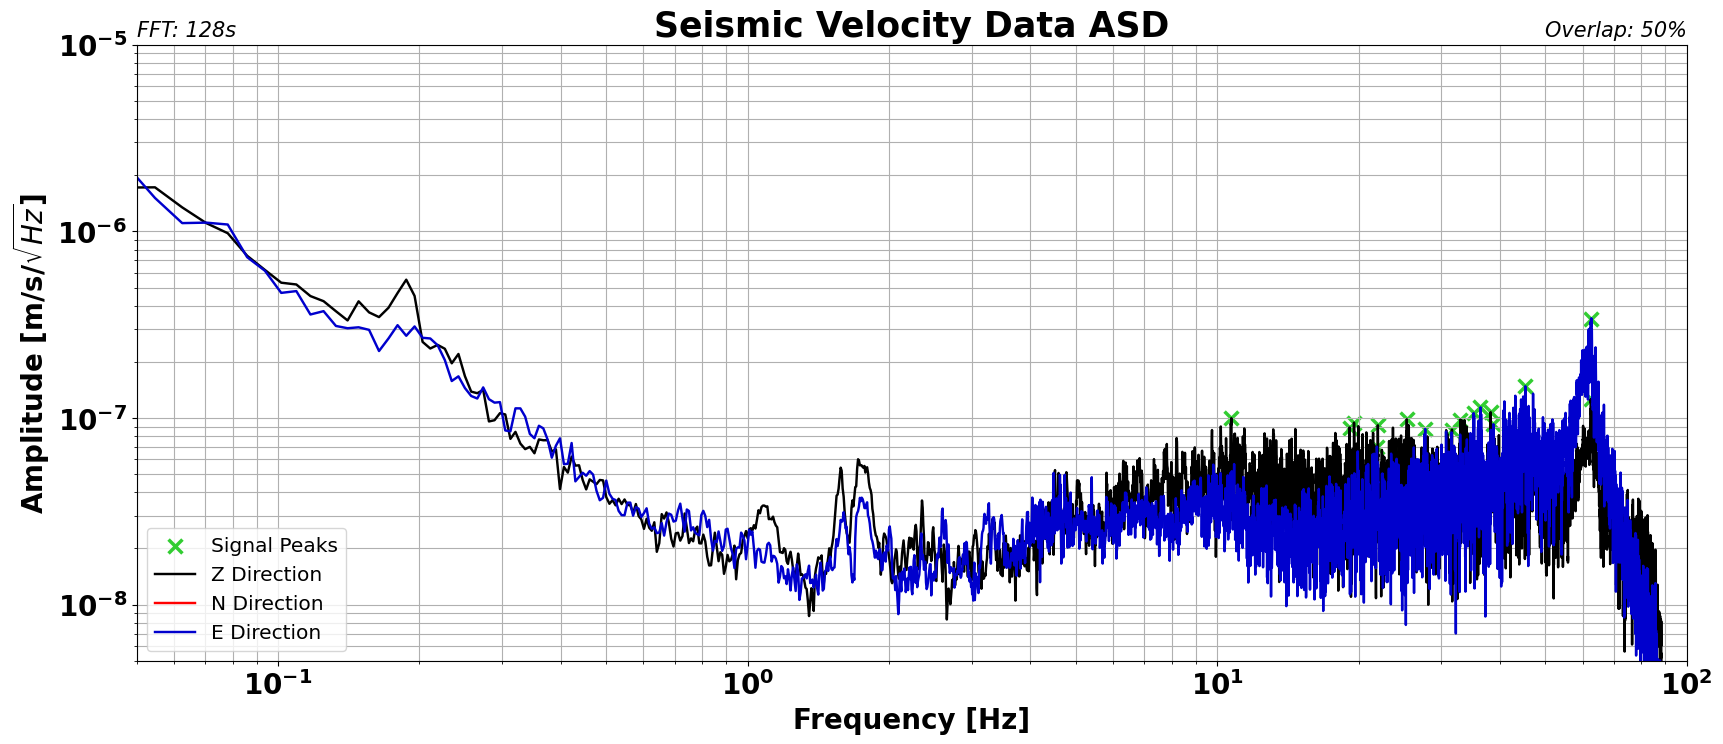

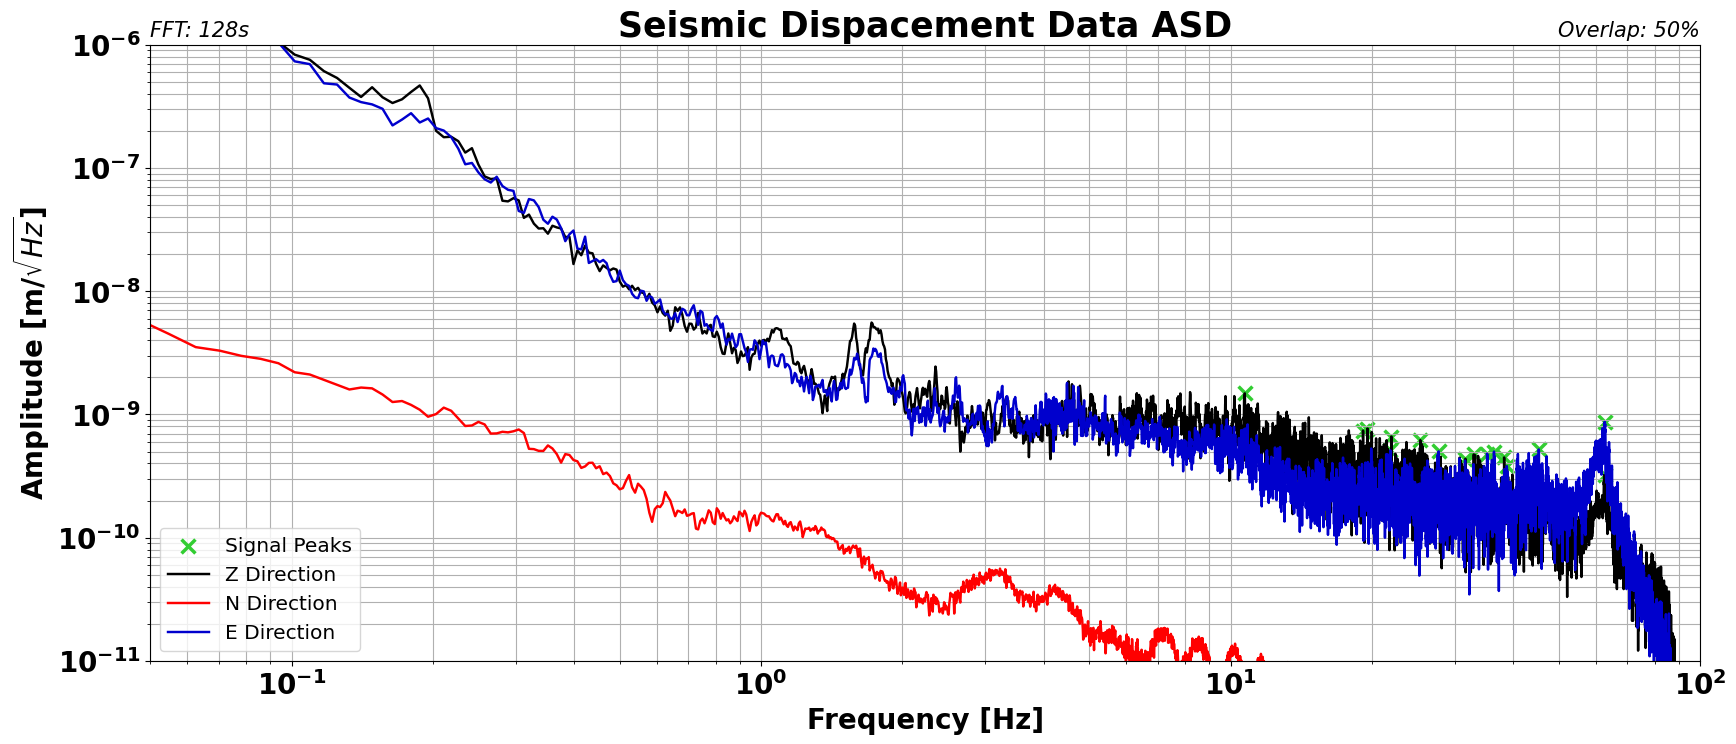

In [29]:
################################################################################################################################
#----------------------------------------- The PSD is calculated via welch from scipy -----------------------------------------#
################################################################################################################################
warnings.simplefilter('ignore')

#----------# If you don't want to look at the whole time series, you can add '1' to the variables, i.e z1, y1, x1 #------------#

                           #  z1
f_z, Pxx_den_z = signal.welch(z, sr, window= 'hamming', nperseg= (sr *fft_length), noverlap= round(sr *(overlap *0.01)) )
f_n, Pxx_den_n = signal.welch(n, sr, window= 'hamming', nperseg= (sr *fft_length), noverlap= round(sr *(overlap *0.01)) )
f_e, Pxx_den_e = signal.welch(e, sr, window= 'hamming', nperseg= (sr *fft_length), noverlap= round(sr *(overlap *0.01)) )


#------------------ nfft is how long the fft bin lengths, noverlap is bin overlap, window is the window used ------------------#
#---------------------- We used 100 sec bins, 0.5 sec overlap, and hamming window, these can be changed -----------------------#
#------------------------------------------------ # DO NOT CHANGE/REMOVE 'fs' # -----------------------------------------------#


az = np.sqrt(Pxx_den_z)
an = np.sqrt(Pxx_den_n) #---------------------------------- This turns the PSD into an ASD ------------------------------------#
ae = np.sqrt(Pxx_den_e)

mz = az / (2*np.pi *f_z)
mn = an / (2*np.pi *f_n) #---------------------------------------- Converts m/s to m ------------------------------------------#
me = ae / (2*np.pi *f_e)


log_z = np.log(az)
log_n = np.log(an) #---------------- The log of each ASD must be found in order to find the peaks/frequences ------------------#
log_e = np.log(ae)


peak_z, _ = signal.find_peaks(log_z, 
                              prominence = 2) #-------------------- This is where the frequencies are found -------------------#
peak_n, _ = signal.find_peaks(log_n, 
                              prominence = 2) #--------------------- If some are missed or there are extra --------------------#
peak_e, _ = signal.find_peaks(log_e, 
                              prominence = 2) #---------------- you will need to change the prominence variable ---------------#



################################################################################################################################
#----------------------------------------------------- Plots Velocity ---------------------------------------------------------#
################################################################################################################################



plt.figure(1, figsize = (20, 8))#, dpi = 2500)

plt.yscale('log')
plt.xscale('log')

#------------------------------------------------------ Plots peaks -----------------------------------------------------------#

plt.scatter(f_z[peak_z], az[peak_z], s = 100, color = 'limegreen', marker = 'x', 
            linewidths = 2.5, label = 'Signal Peaks')
plt.scatter(f_n[peak_n], an[peak_n], s = 100, color = 'limegreen', marker = 'x', 
            linewidths = 2.5)
plt.scatter(f_e[peak_e], ae[peak_e], s = 100, color = 'limegreen', marker = 'x', 
            linewidths = 2.5)

#---------------------------------------------------- PLots Spectra -----------------------------------------------------------#

plt.plot(f_z, az, color = 'black', linewidth = 1.75, label = 'Z Direction')
plt.plot(f_n, an, color = 'red', linewidth = 1.75, label = 'N Direction')
plt.plot(f_e, ae, color = 'mediumblue', linewidth = 1.75, label = 'E Direction')

plt.legend(loc = "lower left", fontsize = 14.5)
plt.title('FFT: ' + str(fft_length) + "s", fontsize = 15, loc = "left",style ='italic')
plt.title("Overlap: " + str(overlap) + "%", fontsize = 15, loc = "right",style ='italic')

plt.title("Seismic Velocity Data ASD", fontweight = 'bold', fontsize = 25)
plt.xlabel("Frequency [Hz]", fontweight = "bold", fontsize = 20)
plt.ylabel("Amplitude [ms⁻¹/√Hz]", fontweight = "bold", fontsize = 20)

plt.yticks(fontsize = 20, fontweight = "bold")
plt.xticks(fontsize = 20, fontweight = "bold")

plt.ylim(y_min,y_max)
plt.xlim(x_min,x_max)

plt.grid(True, which="both", ls="-")

#plt.savefig('**place_img_name_here.format**', bbox_inches='tight')



################################################################################################################################
#---------------------------------------------------- Plots Displacement ------------------------------------------------------#
################################################################################################################################



plt.figure(2, figsize = (20, 8))#, dpi = 2500)
plt.yscale('log')
plt.xscale('log')

#------------------------------------------------------ Plots peaks -----------------------------------------------------------#

plt.scatter(f_z[peak_z], mz[peak_z], s = 100, color = 'limegreen', marker = 'x', 
            linewidths = 2.5, label = 'Signal Peaks')
plt.scatter(f_n[peak_n], mn[peak_n], s = 100, color = 'limegreen', marker = 'x', 
            linewidths = 2.5)
plt.scatter(f_e[peak_e], me[peak_e], s = 100, color = 'limegreen', marker = 'x', 
            linewidths = 2.5)

#---------------------------------------------------- PLots Spectra -----------------------------------------------------------#

plt.plot(f_z, mz, color = 'black', linewidth = 1.75, label = 'Z Direction')
plt.plot(f_n, mn, color = 'red', linewidth = 1.75, label = 'N Direction')
plt.plot(f_e, me, color = 'mediumblue', linewidth = 1.75, label = 'E Direction')

plt.legend(loc = "lower left", fontsize = 14.5)
plt.title('FFT: ' + str(fft_length) + "s", fontsize = 15, loc = "left",style ='italic')
plt.title("Overlap: " + str(overlap) + "%", fontsize = 15, loc = "right",style ='italic')

plt.title("Seismic Dispacement Data ASD", fontweight = 'bold', fontsize = 25)
plt.xlabel("Frequency [Hz]", fontweight = "bold", fontsize = 20)
plt.ylabel("Amplitude [m/√Hz]", fontweight = "bold", fontsize = 20)

plt.yticks(fontsize = 20, fontweight = "bold")
plt.xticks(fontsize = 20, fontweight = "bold")

plt.ylim(my_min,my_max)
plt.xlim(x_min,x_max)

plt.grid(True, which="both", ls="-")

#plt.savefig('place_img_name_here.format', bbox_inches='tight')

## The following cell will plot each of direction signal in their own respective plots
### If you don't want/need to look at them individually, you don't have to run it

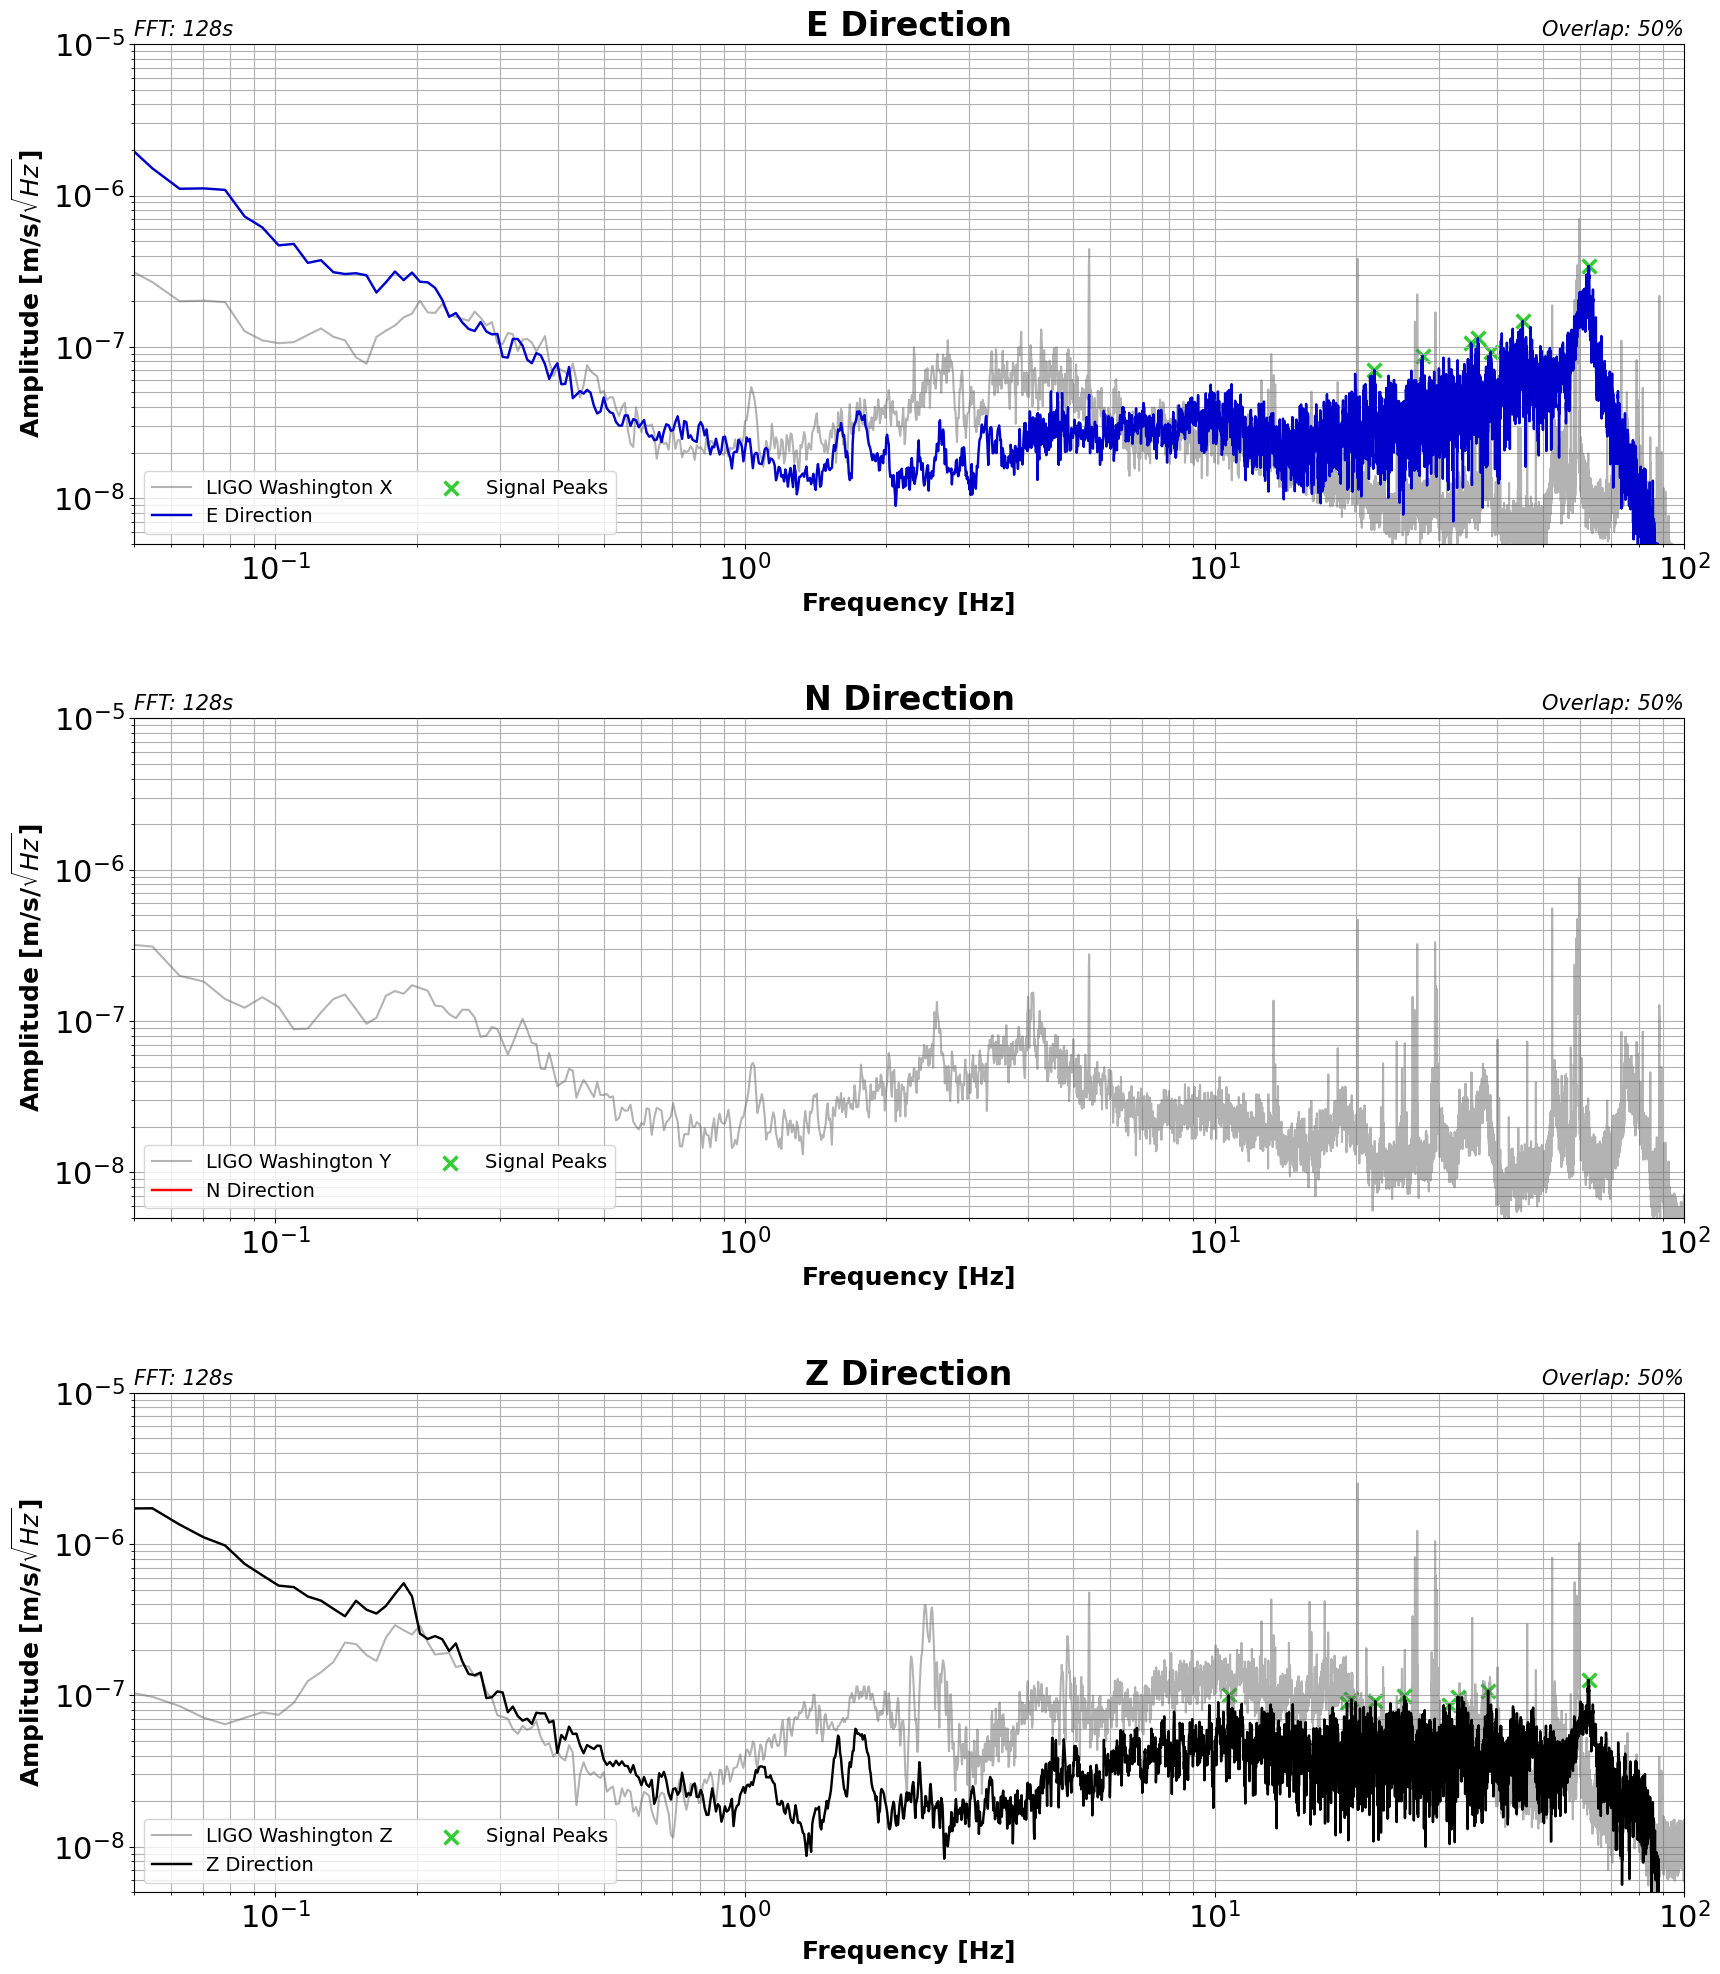

In [30]:
################################################################################################################################
#------------------------------ This gets plotted as a multipanel plot via gridspec and subplot -------------------------------#
################################################################################################################################

fig = plt.figure(figsize = (20,24))
gs = gridspec.GridSpec(3,1, height_ratios = [1,1,1], hspace = 0.35)


########################################################## Channel E ###########################################################


axis1 = fig.add_subplot(gs[0,0])
axis1.set_yscale('log')
axis1.set_xscale('log')
axis1.tick_params(labelsize=22)

#------------------------------------------------------ Plots LIGO Data -------------------------------------------------------#

if os.path.exists(control_data_path):
    axis1.plot(hf,hx, color = "dimgrey", label = "LIGO Washington X", alpha = 0.5)
else:
    print("LIGO data not found")

#------------------------------------------------------------------------------------------------------------------------------#

axis1.plot(f_e, ae, color = 'mediumblue', linewidth = 1.75, label = 'E Direction')

axis1.scatter(f_e[peak_e], ae[peak_e], s = 100, color = 'limegreen', marker = 'x', 
            linewidths = 2.5, label = 'Signal Peaks')

axis1.set_title('FFT: ' + str(fft_length) + "s", fontsize = 15, loc = "left",style ='italic')
axis1.set_title("Overlap: " + str(overlap) + "%", fontsize = 15, loc = "right",style ='italic')

axis1.set_title("E Direction", fontweight = "bold", fontsize = 24)
axis1.set_xlabel("Frequency [Hz]", fontweight = "bold", fontsize = 18)
axis1.set_ylabel("Amplitude [ms⁻¹/√Hz]", fontweight = "bold", fontsize = 18)
axis1.legend(loc = "lower left", fontsize = 14, ncol = 2)

axis1.set_ylim(y_min,y_max)
axis1.set_xlim(x_min,x_max)
axis1.grid(True, which="both", ls="-")


########################################################## Channel N ###########################################################


axis2 = fig.add_subplot(gs[1,0])
axis2.set_yscale('log')
axis2.set_xscale('log')
axis2.tick_params(labelsize=22)

#------------------------------------------------------ Plots LIGO Data -------------------------------------------------------#

if os.path.exists(control_data_path):
    axis2.plot(hf,hy, color = "dimgrey", label = "LIGO Washington Y", alpha = 0.5)

#------------------------------------------------------------------------------------------------------------------------------#

axis2.plot(f_n, an, color = 'red', linewidth = 1.75, label = 'N Direction')

axis2.scatter(f_n[peak_n], an[peak_n], s = 100, color = 'limegreen', marker = 'x', 
            linewidths = 2.5, label = 'Signal Peaks')

axis2.set_title('FFT: ' + str(fft_length) + "s", fontsize = 15, loc = "left",style ='italic')
axis2.set_title("Overlap: " + str(overlap) + "%", fontsize = 15, loc = "right",style ='italic')

axis2.set_title("N Direction", fontweight = "bold", fontsize = 24)
axis2.set_xlabel("Frequency [Hz]", fontweight = "bold", fontsize = 18)
axis2.set_ylabel("Amplitude [ms⁻¹/√Hz]", fontweight = "bold", fontsize = 18)
axis2.legend(loc = "lower left", fontsize = 14, ncol = 2)

axis2.set_ylim(y_min,y_max)
axis2.set_xlim(x_min,x_max)
axis2.grid(True, which="both", ls="-")


########################################################## Channel Z ###########################################################


axis3 = fig.add_subplot(gs[2,0])
axis3.set_yscale('log')
axis3.set_xscale('log')
axis3.tick_params(labelsize=22)

#------------------------------------------------------ Plots LIGO Data -------------------------------------------------------#

if os.path.exists(control_data_path):
    axis3.plot(hf,hz, color = "dimgrey", label = "LIGO Washington Z", alpha = 0.5)

#------------------------------------------------------------------------------------------------------------------------------#

axis3.plot(f_z, az, color = 'black', linewidth = 1.75, label = 'Z Direction')

axis3.scatter(f_z[peak_z], az[peak_z], s = 100, color = 'limegreen', marker = 'x', 
            linewidths = 2.5, label = 'Signal Peaks')

axis3.set_title('FFT: ' + str(fft_length) + "s", fontsize = 15, loc = "left",style ='italic')
axis3.set_title("Overlap: " + str(overlap) + "%", fontsize = 15, loc = "right",style ='italic')

axis3.set_title("Z Direction", fontweight = 'bold' , fontsize = 24)
axis3.set_xlabel("Frequency [Hz]", fontweight = "bold", fontsize = 18)
axis3.set_ylabel("Amplitude [ms⁻¹/√Hz]", fontweight = "bold", fontsize = 18)
axis3.legend(loc = "lower left", fontsize = 14, ncol = 2)

axis3.set_ylim(y_min,y_max)
axis3.set_xlim(x_min,x_max)
axis3.grid(True, which="both", ls="-")


#plt.savefig('place_img_name_here.format', bbox_inches='tight')

## The following cells are used to plot spectrograms for each direction

### These variables are to set limits for the plot and to compute the spectrogram

In [13]:
#------------------------------------------------------ Colorbar Limits -------------------------------------------------------#
cmin = 10e-10
cmax = 10e-8

#-------------------------------------------------------- Plot limits ---------------------------------------------------------#
ymax = 20 ## In terms of frequency
ymin = 0

#-------------------------------------------------------- fft length ----------------------------------------------------------#
fft_len = 10 ## in terms of seconds

#---------------------------------------------------- Precent FFT Overlap -----------------------------------------------------#
olap = 50 ## 50% fft overlap

# This is where the spectrograms are plotted

'\naxis4 = fig.add_subplot(gs[3,0])\n\naxis4.set_title("Noise Direction", fontweight = \'bold\' , fontsize = 20)\n\nm3 = axis1.pcolormesh(t, f, np.sqrt(Sxx), shading=\'gouraud\') ############### This will autoscale the plot ###################\n                                                                \nm3 = axis4.pcolormesh(t, f, np.sqrt(Sxx), shading=\'gouraud\', vmin = cmin, vmax = cmax) ### Uncomment this to add inputs ###\n\naxis4.set_title(\'FFT: \' + str(fft_len) + "s", fontsize = 15, loc = "left",style =\'italic\')\naxis4.set_title("Overlap: " + str(olap) + "%", fontsize = 15, loc = "right",style =\'italic\')\n\naxis3.set_title("Electronic Noise", fontweight = \'bold\' , fontsize = 20)\naxis3.set_xlabel(\'Time [s]\', fontweight = \'bold\' , fontsize = 18)\naxis3.set_ylabel(\'Frequency [Hz]\', fontweight = \'bold\' , fontsize = 18)\naxis3.tick_params(labelsize=16)\n\ncbar3 = fig.colorbar(m3, pad = 0.02)\ncbar3.ax.tick_params(labelsize=14)\ncbar3.set_label(label=\'Intensity

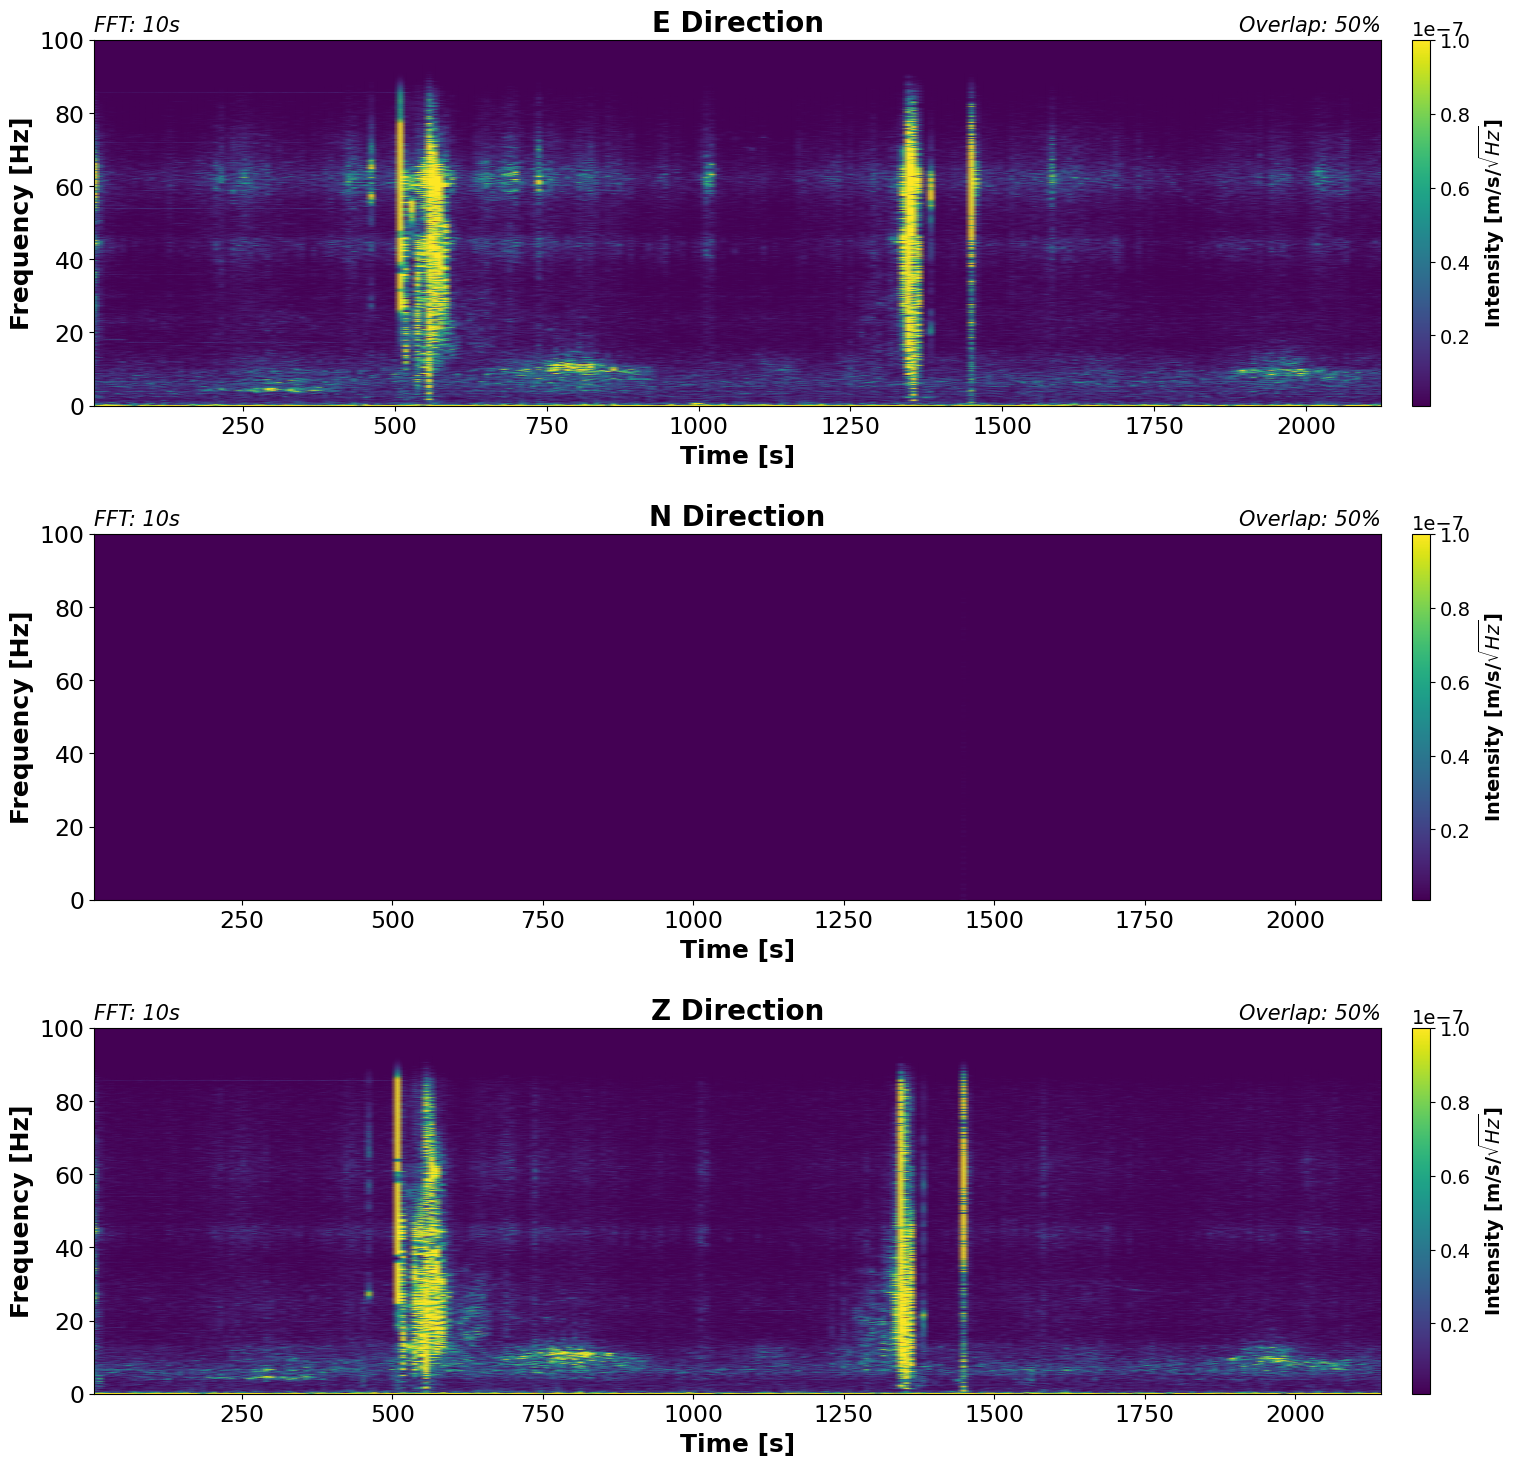

In [22]:
################################################################################################################################
#----------------------------- The spectrograms are calculated with signal.spectrogram from SciPy -----------------------------#
################################################################################################################################
warnings.simplefilter('ignore')

fz, tz, Sxxz = signal.spectrogram(z, sr, window= 'hamming', nperseg=round(sr *fft_len), noverlap= round(sr *(olap *0.01)) )
fn, tn, Sxxn = signal.spectrogram(n, sr, window= 'hamming', nperseg=round(sr *fft_len), noverlap= round(sr *(olap *0.01)) )
fe, te, Sxxe = signal.spectrogram(e, sr, window= 'hamming', nperseg=round(sr *fft_len), noverlap= round(sr *(olap *0.01)) )
#f, t, Sxx = signal.spectrogram(noi, sr, window= 'hamming', nperseg=round(sr *fft_len), noverlap= round(sr *(olap *0.01)) )


fig = plt.figure(figsize = (20,24))

gs = gridspec.GridSpec(4,1, height_ratios = [1,1,1,1], hspace = 0.35)

####################################################### Channel E ##############################################################

axis3 = fig.add_subplot(gs[0,0])

#m2 = axis3.pcolormesh(te, fe, np.sqrt(Sxxe), shading='gouraud') #---------------- This will autoscale the plot ----------------#
                                                                #- If you want to change the limits, uncomment the line below -#
                                                                #----------- Be sure to comment out the line above ------------#
                                                                
m2 = axis3.pcolormesh(te, fe, np.sqrt(Sxxe), shading='gouraud', vmin = cmin, vmax = cmax) ### Uncomment this to add inputs ###

axis3.set_title('FFT: ' + str(fft_len) + "s", fontsize = 15, loc = "left",style ='italic')
axis3.set_title("Overlap: " + str(olap) + "%", fontsize = 15, loc = "right",style ='italic')

axis3.set_title("E Direction", fontweight = 'bold' , fontsize = 20)
axis3.set_xlabel('Time [s]', fontweight = 'bold' , fontsize = 18)
axis3.set_ylabel('Frequency [Hz]', fontweight = 'bold' , fontsize = 18)
axis3.tick_params(labelsize=17)

cbar2 = fig.colorbar(m2, pad = 0.02)
cbar2.ax.tick_params(labelsize = 14)
cbar2.set_label(label=r'Intensity [ms⁻¹/√Hz]' ,weight='bold', fontsize = 14)
cbar2.ax.yaxis.offsetText.set_fontsize(14)
cbar2.ax.yaxis.set_offset_position('left')

#axis3.set_ylim(ymin, ymax)   ## Uncomment to set limits


####################################################### Channel N ##############################################################


axis2 = fig.add_subplot(gs[1,0])

#m1 = axis2.pcolormesh(tn, fn, np.sqrt(Sxxn), shading='gouraud')#--------------- This will autoscale the plot -----------------#
                                                                
m1 = axis2.pcolormesh(tn, fn, np.sqrt(Sxxn), shading='gouraud', vmin = cmin, vmax = cmax) ### Uncomment this to add inputs ###

axis2.set_title('FFT: ' + str(fft_len) + "s", fontsize = 15, loc = "left",style ='italic')
axis2.set_title("Overlap: " + str(olap) + "%", fontsize = 15, loc = "right",style ='italic')

axis2.set_title("N Direction", fontweight = 'bold' , fontsize = 20)
axis2.set_xlabel('Time [s]', fontweight = 'bold' , fontsize = 18)
axis2.set_ylabel('Frequency [Hz]', fontweight = 'bold' , fontsize = 18)
axis2.tick_params(labelsize=17)

cbar1 = fig.colorbar(m1, pad = 0.02)
cbar1.ax.tick_params(labelsize = 14)
cbar1.set_label(label='Intensity [ms⁻¹/√Hz]' ,weight='bold', fontsize = 14)
cbar1.ax.yaxis.offsetText.set_fontsize(14)
cbar1.ax.yaxis.set_offset_position('left')

#axis2.set_ylim(ymin, ymax)   ## Uncomment to set limits


####################################################### Channel Z ##############################################################

axis1 = fig.add_subplot(gs[2,0])

#m0 = axis1.pcolormesh(tz, fz, np.sqrt(Sxxz), shading='gouraud')#--------------- This will autoscale the plot -----------------#

m0 = axis1.pcolormesh(tz, fz, np.sqrt(Sxxz), shading='gouraud', vmin = cmin, vmax = cmax) ### Uncomment this to add inputs ###

axis1.set_title('FFT: ' + str(fft_len) + "s", fontsize = 15, loc = "left",style ='italic')
axis1.set_title("Overlap: " + str(olap) + "%", fontsize = 15, loc = "right",style ='italic')

axis1.set_title("Z Direction", fontweight = 'bold' , fontsize = 20)
axis1.set_xlabel('Time [s]', fontweight = 'bold' , fontsize = 18)
axis1.set_ylabel('Frequency [Hz]', fontweight = 'bold' , fontsize = 18)
axis1.tick_params(labelsize=17)

cbar0 = fig.colorbar(m0, pad = 0.02)
cbar0.ax.tick_params(labelsize = 14)
cbar0.set_label(label='Intensity [ms⁻¹/√Hz]' ,weight='bold', fontsize = 14)
cbar0.ax.yaxis.offsetText.set_fontsize(14)
cbar0.ax.yaxis.set_offset_position('left')

#axis1.set_ylim(ymin,ymax)   ## Uncomment to set limits


###################################################### Noise Channel ###########################################################

'''
axis4 = fig.add_subplot(gs[3,0])

axis4.set_title("Noise Direction", fontweight = 'bold' , fontsize = 20)

m3 = axis1.pcolormesh(t, f, np.sqrt(Sxx), shading='gouraud') ############### This will autoscale the plot ###################
                                                                
m3 = axis4.pcolormesh(t, f, np.sqrt(Sxx), shading='gouraud', vmin = cmin, vmax = cmax) ### Uncomment this to add inputs ###

axis4.set_title('FFT: ' + str(fft_len) + "s", fontsize = 15, loc = "left",style ='italic')
axis4.set_title("Overlap: " + str(olap) + "%", fontsize = 15, loc = "right",style ='italic')

axis3.set_title("Electronic Noise", fontweight = 'bold' , fontsize = 20)
axis3.set_xlabel('Time [s]', fontweight = 'bold' , fontsize = 18)
axis3.set_ylabel('Frequency [Hz]', fontweight = 'bold' , fontsize = 18)
axis3.tick_params(labelsize=16)

cbar3 = fig.colorbar(m3, pad = 0.02)
cbar3.ax.tick_params(labelsize=14)
cbar3.set_label(label='Intensity [ms⁻¹/√Hz]' ,weight='bold', fontsize = 14)
cbar3.ax.yaxis.offsetText.set_fontsize(14)
cbar3.ax.yaxis.set_offset_position('left')


#axis4.set_ylim(ymin, ymax)   ## Uncomment to set limits


'''


#plt.savefig('place_img_name_here.format', bbox_inches='tight')


################################################################################################################################
################################## These will take a while to plot, since they are so dense ####################################